In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("../data/movie_data.csv", delimiter=";")
df.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0


In [3]:
def data_preprocessing(df):
    var_df = df.select_dtypes(include='float64').dropna()

    scaler = StandardScaler()
    std_df = scaler.fit_transform(var_df)
    std_df = pd.DataFrame(data=std_df, columns=var_df.columns)

    return var_df, std_df

In [4]:
var_df, std_df = data_preprocessing(df)

In [5]:
var_df.head()

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000.0,21.946943,1.0,1.0,373554033.0,81.0,1.0,7.7,5415.0
1,65000000.0,17.015539,3.0,1.0,262797249.0,104.0,2.0,6.9,2413.0
2,16000000.0,3.859495,1.0,1.0,81452156.0,127.0,1.0,6.1,34.0
3,60000000.0,17.924927,3.0,1.0,187436818.0,170.0,2.0,7.7,1886.0
4,35000000.0,5.231580,3.0,1.0,64350171.0,106.0,1.0,5.5,174.0


In [6]:
std_df.head()

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
0,-0.034670,2.128605,-0.886664,-0.463136,1.788698,-1.360726,-0.525049,1.566746,3.951587
1,0.854473,1.302755,0.036814,-0.463136,1.088086,-0.291382,0.553363,0.679210,1.423905
2,-0.390327,-0.900457,-0.886664,-0.463136,-0.059045,0.777963,-0.525049,-0.208327,-0.579211
3,0.727452,1.455048,0.036814,-0.463136,0.611380,2.777173,0.553363,1.566746,0.980171
4,0.092350,-0.670677,0.036814,-0.463136,-0.167226,-0.198395,-0.525049,-0.873979,-0.461332


In [7]:
std_df.shape

(5180, 9)

### HC Custom Implementation

In [8]:
# def _linkage(y, method='single', metric='euclidean', optimal_ordering=False):
#     n = int(np.sqrt(2 * len(y) + 0.25) + 0.5)
#     print(f"Number of observations n=({n})")

#     # Initialize the distance matrix
#     dist_matrix = np.zeros((n, n))

#     # Create a 2D index array for the upper triangular part of the matrix
#     i, j = np.triu_indices(n, k=1)

#     # Assign values from the flattened array y to the upper triangular part of the matrix
#     dist_matrix[i, j] = y

#     # Initialize the clusters
#     clusters = [{i} for i in range(n)]

#     # Perform hierarchical clustering
#     while len(clusters) > 1:
#         min_dist = np.inf
#         merge_indices = (0, 0)

#         # Find the pair of clusters with the minimum distance
#         for i in range(len(clusters)):
#             for j in range(i + 1, len(clusters)):
#                 cluster_i = clusters[i]
#                 cluster_j = clusters[j]

#                 if method == 'single':
#                     dist = np.min(dist_matrix[list(cluster_i)][:, list(cluster_j)])
#                 else:
#                     raise ValueError(f"Unsupported linkage method: {method}")

#                 if dist < min_dist:
#                     min_dist = dist
#                     merge_indices = (i, j)

#         # Merge the two clusters with the minimum distance
#         merged_cluster = clusters[merge_indices[0]].union(clusters[merge_indices[1]])
#         clusters.pop(merge_indices[1])
#         clusters[merge_indices[0]] = merged_cluster

#         # Update the distance matrix
#         for i in range(len(clusters) - 1):
#             for j in range(i + 1, len(clusters)):
#                 dist = np.min(dist_matrix[list(clusters[i])][:, list(clusters[j])])
#                 dist_matrix[i, j] = dist
#                 dist_matrix[j, i] = dist

#     # Return the linkage matrix
#     linkage_matrix = np.zeros((n - 1, 4))
#     clusters = [i for i in clusters[0]]
#     print(f"Clusters: {clusters}")
#     print(f"Linkage matrix shape: {linkage_matrix.shape}")
#     for i in range(n - 1):
#         print(f"n={n}, i={i}, clusters[i]={clusters}, {list(clusters)[i]}")
#         linkage_matrix[i, 0] = clusters[i]
#         linkage_matrix[i, 1] = clusters[i]
#         linkage_matrix[i, 2] = dist_matrix[i, i + 1]
#         linkage_matrix[i, 3] = len(clusters) + 1

#     return linkage_matrix

In [9]:
# _linkage(y, method='single')

In [10]:
# class LinkageUnionFind:
#     """Structure for fast cluster labeling in an unsorted dendrogram."""

#     def __init__(self, n):
#         self.parent = np.arange(2 * n - 1, dtype=np.intc)
#         self.next_label = n
#         self.size = np.ones(2 * n - 1, dtype=np.intc)

#     def merge(self, x, y):
#         self.parent[x] = self.next_label
#         self.parent[y] = self.next_label
#         size = self.size[x] + self.size[y]
#         self.size[self.next_label] = size
#         self.next_label += 1
#         return size

#     def find(self, x):
#         p = x

#         while self.parent[x] != x:
#             x = self.parent[x]

#         while self.parent[p] != x:
#             p, self.parent[p] = self.parent[p], x

#         return x

In [11]:
# def mst_single_linkage(dists, n):
#     """Perform hierarchy clustering using MST algorithm for single linkage.

#     Parameters
#     ----------
#     dists : ndarray
#         A condensed matrix stores the pairwise distances of the observations.
#     n : int
#         The number of observations.

#     Returns
#     -------
#     Z : ndarray, shape (n - 1, 4)
#         Computed linkage matrix.
#     """
#     Z_arr = np.empty((n - 1, 4))
#     Z = Z_arr

#     # Which nodes were already merged.
#     merged = np.zeros(n, dtype=np.intc)

#     D = np.empty(n)
#     D[:] = np.inf

#     x, y = 0, 0

#     for k in range(n - 1):
#         current_min = np.inf
#         merged[x] = 1

#         for i in range(n):
#             if merged[i] == 1:
#                 continue

#             dist = dists[condensed_index(n, x, i)]
#             if np.any(D[i] > dist):
#                 D[i] = dist
#             if np.any(D[i] < current_min):
#                 y = i
#                 current_min = D[i]


#         Z[k, 0] = x
#         Z[k, 1] = y
#         Z[k, 2] = current_min
#         x = y

#     # Sort Z by cluster distances.
#     order = np.argsort(Z_arr[:, 2], kind='mergesort')
#     Z_arr = Z_arr[order]

#     # Find correct cluster labels and compute cluster sizes inplace.
#     label(Z_arr, n)

#     return Z_arr

# def condensed_index(n, i, j):
#     return n * j - j * (j + 1) // 2 + i - 1 - j

# def label(Z, n):
#     """Correctly label clusters in unsorted dendrogram."""
#     uf = LinkageUnionFind(n)
#     for i in range(n - 1):
#         x, y = int(Z[i, 0]), int(Z[i, 1])
#         x_root, y_root = uf.find(x), uf.find(y)
#         if x_root < y_root:
#             Z[i, 0], Z[i, 1] = x_root, y_root
#         else:
#             Z[i, 0], Z[i, 1] = y_root, x_root
#         Z[i, 3] = uf.merge(x_root, y_root)

In [12]:
# n = int(distance.num_obs_y(y))
# n

In [13]:
# _Z = mst_single_linkage(y, n)

## HCA 

In [14]:
y = pdist(std_df.to_numpy(), metric='euclidean')
y

array([3.50708427, 6.40069311, 5.51252144, ..., 4.30796742, 2.29275562,
       3.64615234])

In [15]:
Z = linkage(y, method='complete')
Z

array([[0.00000000e+00, 4.93200000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 4.93300000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 4.93400000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.03520000e+04, 1.03550000e+04, 1.65416039e+01, 5.08200000e+03],
       [1.03510000e+04, 1.03560000e+04, 2.04309553e+01, 5.17500000e+03],
       [1.03340000e+04, 1.03570000e+04, 2.38583968e+01, 5.18000000e+03]])

In [16]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='grey', lw=2, linestyle='dashed')
    return ddata

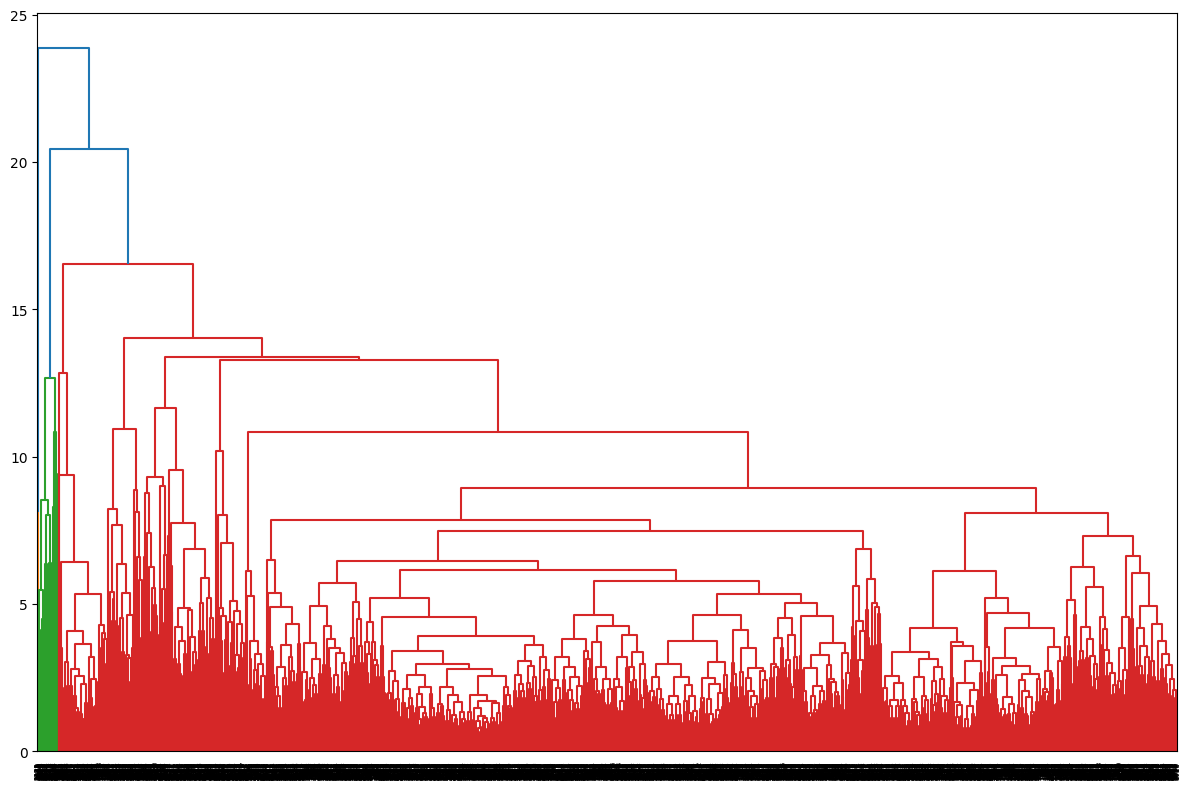

In [17]:
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.tight_layout()
plt.show()

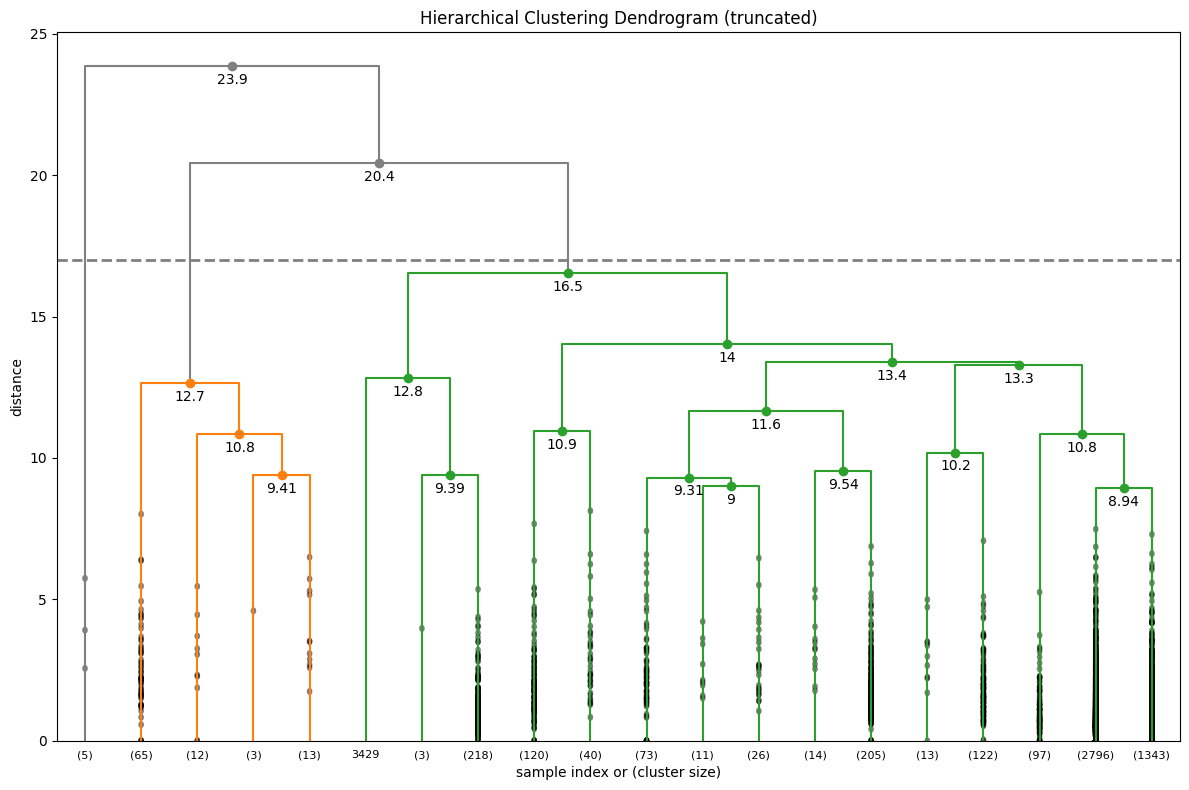

In [18]:
plt.figure(figsize=(12, 8))

fancy_dendrogram(
    Z, 
    labels=std_df.index,
    # leaf_rotation=45, 
    leaf_font_size=8, 
    show_leaf_counts=True,
    above_threshold_color='grey',
    distance_sort='ascending',
    truncate_mode='lastp',
    annotate_above=1,
    show_contracted=True,
    max_d=17,
    p=20
)

plt.tight_layout()
plt.show()

# Predicting clusters

In [19]:
from sklearn.utils import shuffle

movies_df = pd.read_csv("../data/movie_data.csv", delimiter=";")

# Step 1: Shuffle the data
movies_df = shuffle(movies_df, random_state=42)

# Step 2: Filter the dataset
selected_genres = ['Action', 'Comedy', 'Drama']
subset = movies_df[movies_df['genres'].isin(selected_genres)].dropna()

# Step 3: Split the subset into train and test
train_size = int(0.8 * len(subset))
train_data = subset[:train_size]
test_data = subset[train_size:]

In [20]:
train_data.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
3114,30000000.0,Comedy,tt0800039,Forgetting Sarah Marshall,When Sarah Marshall dumps aspiring musician Pe...,15.106676,2.0,1.0,2008-04-17,105173115.0,111.0,3.0,6.4,1194.0
1199,12000000.0,Action,tt0093596,Nadine,Hairdresser Nadine Hightower wants to retrieve...,7.569698,1.0,1.0,1987-08-07,5669831.0,83.0,1.0,5.5,21.0
4550,500000.0,Drama,tt1144551,Peter and Vandy,Flashbacks and flash-forwards illustrate the r...,0.892007,0.0,0.0,2009-01-01,11276.0,78.0,1.0,6.5,8.0
5237,11000000.0,Action,tt5362988,Wind River,An FBI agent teams with the town's veteran gam...,40.796775,3.0,3.0,2017-08-03,184770205.0,111.0,1.0,7.4,181.0
5317,50000000.0,Drama,tt0114345,The Scarlet Letter,"Set in puritanical Boston in the mid 1600s, th...",6.752119,2.0,1.0,1995-10-13,10382407.0,135.0,1.0,5.5,111.0


In [21]:
test_data.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
1301,22000000.0,Action,tt0088172,Starman,An alien takes the form of a young widow's hus...,9.763928,3.0,1.0,1984-12-13,28744356.0,115.0,1.0,6.6,219.0
236,15000000.0,Drama,tt0115963,The Craft,A Catholic school newcomer falls in with a cli...,12.860385,1.0,1.0,1996-05-03,24769466.0,101.0,1.0,6.3,388.0
2573,2515000.0,Drama,tt0078444,An Unmarried Woman,A wealthy woman from Manhattan's Upper East Si...,1.148295,1.0,1.0,1978-05-26,24000000.0,124.0,1.0,6.1,17.0
3280,1500000.0,Comedy,tt0489235,My Name Is Bruce,B Movie Legend Bruce Campbell is mistaken for ...,8.708789,2.0,1.0,2007-10-01,173066.0,86.0,1.0,5.9,107.0
3186,25000000.0,Action,tt1213644,Disaster Movie,"In DISASTER MOVIE, the filmmaking team behind ...",11.634132,3.0,1.0,2008-08-29,14109284.0,87.0,1.0,3.1,250.0


In [22]:
numerical_columns = ["budget","popularity","production_companies","production_countries","revenue","runtime","spoken_languages","vote_average","vote_count"]

scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

/tmp/ipykernel_3759055/4011132504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
/tmp/ipykernel_3759055/4011132504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])


In [23]:
train_data.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
3114,0.044543,Comedy,tt0800039,Forgetting Sarah Marshall,When Sarah Marshall dumps aspiring musician Pe...,1.086330,-0.396292,-0.467805,2008-04-17,0.211775,-0.046587,1.571157,0.147079,0.528851
1199,-0.459538,Action,tt0093596,Nadine,Hairdresser Nadine Hightower wants to retrieve...,-0.175153,-0.873756,-0.467805,1987-08-07,-0.521209,-1.318399,-0.546360,-0.842528,-0.537837
4550,-0.781589,Drama,tt1144551,Peter and Vandy,Flashbacks and flash-forwards illustrate the r...,-1.292815,-1.351221,-1.851796,2009-01-01,-0.562892,-1.545509,-0.546360,0.257035,-0.549659
5237,-0.487542,Action,tt5362988,Wind River,An FBI agent teams with the town's veteran gam...,5.386148,0.081173,2.300178,2017-08-03,0.798121,-0.046587,-0.546360,1.246641,-0.392339
5317,0.604632,Drama,tt0114345,The Scarlet Letter,"Set in puritanical Boston in the mid 1600s, th...",-0.311993,-0.396292,-0.467805,1995-10-13,-0.486494,1.043537,-0.546360,-0.842528,-0.455994


In [24]:
test_data.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
1301,-0.179493,Action,tt0088172,Starman,An alien takes the form of a young widow's hus...,0.192101,0.081173,-0.467805,1984-12-13,-0.351232,0.135100,-0.54636,0.366991,-0.357783
236,-0.375524,Drama,tt0115963,The Craft,A Catholic school newcomer falls in with a cli...,0.710363,-0.873756,-0.467805,1996-05-03,-0.380513,-0.500806,-0.54636,0.037122,-0.204099
2573,-0.725160,Drama,tt0078444,An Unmarried Woman,A wealthy woman from Manhattan's Upper East Si...,-1.249920,-0.873756,-0.467805,1978-05-26,-0.386181,0.543897,-0.54636,-0.182790,-0.541475
3280,-0.753584,Comedy,tt0489235,My Name Is Bruce,B Movie Legend Bruce Campbell is mistaken for ...,0.015499,-0.396292,-0.467805,2007-10-01,-0.561700,-1.182134,-0.54636,-0.402703,-0.459632
3186,-0.095480,Action,tt1213644,Disaster Movie,"In DISASTER MOVIE, the filmmaking team behind ...",0.505122,0.081173,-0.467805,2008-08-29,-0.459040,-1.136712,-0.54636,-3.481478,-0.329592


In [25]:
features = train_data[numerical_columns]
features.head()

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
3114,0.044543,1.086330,-0.396292,-0.467805,0.211775,-0.046587,1.571157,0.147079,0.528851
1199,-0.459538,-0.175153,-0.873756,-0.467805,-0.521209,-1.318399,-0.546360,-0.842528,-0.537837
4550,-0.781589,-1.292815,-1.351221,-1.851796,-0.562892,-1.545509,-0.546360,0.257035,-0.549659
5237,-0.487542,5.386148,0.081173,2.300178,0.798121,-0.046587,-0.546360,1.246641,-0.392339
5317,0.604632,-0.311993,-0.396292,-0.467805,-0.486494,1.043537,-0.546360,-0.842528,-0.455994


In [26]:
y = pdist(features.to_numpy(), metric='euclidean')
y

array([3.29077576, 4.20430455, 5.79193892, ..., 4.92290296, 1.64740854,
       5.43815652])

In [27]:
linkage_matrix = linkage(y, method='complete')
linkage_matrix

array([[5.60000000e+01, 1.71500000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.91000000e+02, 2.48900000e+03, 0.00000000e+00, 2.00000000e+00],
       [8.03000000e+02, 1.90100000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.97900000e+03, 4.98200000e+03, 1.38489855e+01, 2.32000000e+03],
       [4.98300000e+03, 4.98400000e+03, 1.40848699e+01, 2.47000000e+03],
       [4.98100000e+03, 4.98500000e+03, 1.98010057e+01, 2.49400000e+03]])

In [28]:
clustering_model = AgglomerativeClustering(n_clusters=len(selected_genres), affinity='euclidean', linkage='ward')

In [29]:
cluster_labels = clustering_model.fit_predict(features)
cluster_labels

/home/viti/.cache/pypoetry/virtualenvs/ml-nT3YCEpe-py3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 1, 1, ..., 1, 1, 2])

In [30]:
train_data['cluster_label'] = cluster_labels
train_data.head()

/tmp/ipykernel_3759055/2781273645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cluster_label'] = cluster_labels


,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cluster_label
3114,0.044543,Comedy,tt0800039,Forgetting Sarah Marshall,When Sarah Marshall dumps aspiring musician Pe...,1.086330,-0.396292,-0.467805,2008-04-17,0.211775,-0.046587,1.571157,0.147079,0.528851,2
1199,-0.459538,Action,tt0093596,Nadine,Hairdresser Nadine Hightower wants to retrieve...,-0.175153,-0.873756,-0.467805,1987-08-07,-0.521209,-1.318399,-0.546360,-0.842528,-0.537837,1
4550,-0.781589,Drama,tt1144551,Peter and Vandy,Flashbacks and flash-forwards illustrate the r...,-1.292815,-1.351221,-1.851796,2009-01-01,-0.562892,-1.545509,-0.546360,0.257035,-0.549659,1
5237,-0.487542,Action,tt5362988,Wind River,An FBI agent teams with the town's veteran gam...,5.386148,0.081173,2.300178,2017-08-03,0.798121,-0.046587,-0.546360,1.246641,-0.392339,0
5317,0.604632,Drama,tt0114345,The Scarlet Letter,"Set in puritanical Boston in the mid 1600s, th...",-0.311993,-0.396292,-0.467805,1995-10-13,-0.486494,1.043537,-0.546360,-0.842528,-0.455994,1


In [31]:
true_labels = train_data['genres'].astype('category').cat.codes
accuracy = accuracy_score(true_labels, cluster_labels)
accuracy

0.40978348035284684

In [32]:
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
true_labels_encoded

array([1, 0, 2, ..., 0, 0, 0])

In [33]:
confusion_matrix = pd.crosstab(true_labels_encoded, cluster_labels, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1,2
Actual,,,
0,168,375,186
1,81,599,108
2,90,632,255


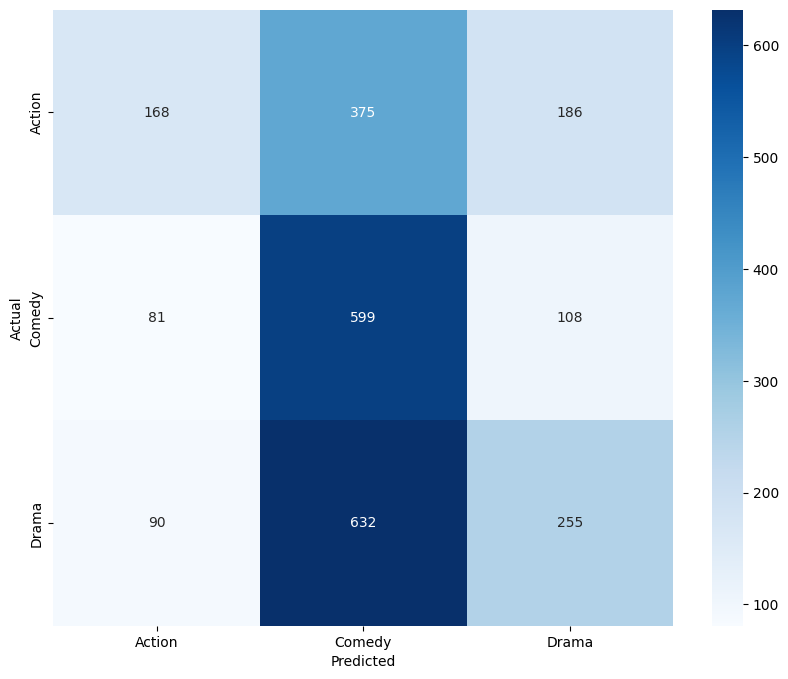

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_genres, yticklabels=selected_genres)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()